In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import redcaputils
import statsmodels.formula.api as smf
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
patients = pd.read_csv("patients.csv")
controls = pd.read_csv("controls.csv")
df = pd.concat([patients, controls])

# Correlations with statistical significance

In [3]:
alpha = 0.05
corr_r = {}
corr_p = {}
corr_b = {} #survives Bonferoni

variables = df.columns #or use all
variablesNo = len(variables)
#not counting correlation of the variable with itself, count only half of correlations (they are symmetrical)
Bonferoni = 2 * alpha/float((variablesNo-1)*(variablesNo-1))

for variable in variables:
    corr_r[variable] = []
    corr_p[variable] = []
    corr_b[variable] = []
    for column in df.columns:
        if variable == column:
            corr_r[variable].append(1)
            corr_p[variable].append(0)
            corr_b[variable].append( True )
        else:    
            corrdf = df[[variable, column]].dropna(how='any')
            r, p = scipy.stats.pearsonr(corrdf[variable], corrdf[column])
            corr_r[variable].append(r)
            corr_p[variable].append(p)
            corr_b[variable].append( p < Bonferoni )
corr_r = pd.DataFrame(corr_r, index=df.columns)
corr_p = pd.DataFrame(corr_p, index=df.columns)
corr_b = pd.DataFrame(corr_b, index=df.columns)

In [4]:
corr_r.sort_index()

,3rd_ventricle,PATIENT,SN_area,SN_index,age,gender
3rd_ventricle,1.000000,0.031055,0.084081,-0.167351,0.519212,0.229040
PATIENT,0.031055,1.000000,0.362977,0.210592,0.152647,0.318072
SN_area,0.084081,0.362977,1.000000,0.450185,0.171549,0.208983
SN_index,-0.167351,0.210592,0.450185,1.000000,0.072416,-0.046826
age,0.519212,0.152647,0.171549,0.072416,1.000000,0.081719
gender,0.229040,0.318072,0.208983,-0.046826,0.081719,1.000000


In [5]:
corr_p.sort_index()

,3rd_ventricle,PATIENT,SN_area,SN_index,age,gender
3rd_ventricle,0.000000e+00,0.763904,0.415375,0.103159,5.960148e-08,0.024790
PATIENT,7.639037e-01,0.000000,0.000258,0.038407,1.355238e-01,0.001499
SN_area,4.153752e-01,0.000258,0.000000,0.000004,9.292982e-02,0.039946
SN_index,1.031586e-01,0.038407,0.000004,0.000000,4.808742e-01,0.648779
age,5.960148e-08,0.135524,0.092930,0.480874,0.000000e+00,0.426185
gender,2.478999e-02,0.001499,0.039946,0.648779,4.261850e-01,0.000000


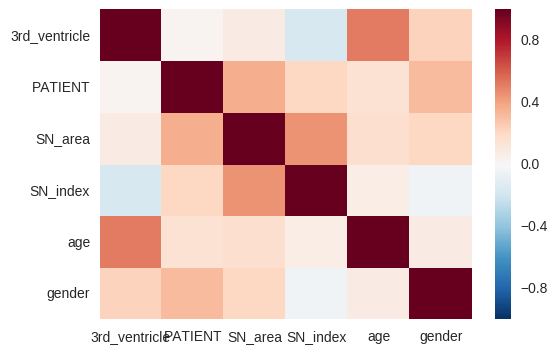

In [6]:
sns.heatmap(corr_r.sort_index())

In [7]:
corr_b.sort_index()

,3rd_ventricle,PATIENT,SN_area,SN_index,age,gender
3rd_ventricle,True,False,False,False,True,False
PATIENT,False,True,True,False,False,True
SN_area,False,True,True,True,False,False
SN_index,False,False,True,True,False,False
age,True,False,False,False,True,False
gender,False,True,False,False,False,True


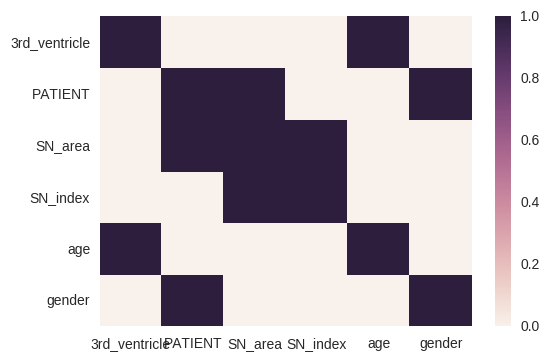

In [8]:
sns.heatmap(corr_b.sort_index())